# Pose Estimation

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

````{warning}
Using the following method to load the model will give me an error:
- Load an empty model by passing a YAML file to the `YOLO` class.
- Then, load the pretrained weights into the model using the `load` method.

```py
model = YOLO("yolov8n-pose.yaml").load("yolov8n-pose.pt")
```
````

Load the model with pre-trained weights.
If you are loading it for the first time, a PyTorch checkpoint file will be downloaded automatically under the current working directory.

In [4]:
# Load the model with pre-trained weights
model = YOLO("yolov8n-pose.pt")

model

YOLO(
  (model): PoseModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=

## Prediction

In [5]:
results = model("./images/yoga-1.png")

results


image 1/1 /Users/isaac/Documents/py-notes/book/yolov8/images/yoga-1.png: 512x640 1 person, 202.9ms
Speed: 4.0ms preprocess, 202.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[179, 186, 187],
         [179, 186, 187],
         [179, 186, 187],
         ...,
         [208, 211, 211],
         [208, 211, 211],
         [208, 211, 211]],
 
        [[182, 190, 191],
         [182, 190, 191],
         [182, 190, 191],
         ...,
         [208, 211, 211],
         [208, 211, 211],
         [208, 211, 211]],
 
        [[185, 193, 194],
         [185, 193, 194],
         [185, 193, 194],
         ...,
         [208, 211, 211],
         [208, 211, 211],
         [208, 211, 211]],
 
        ...,
 
        [[191, 192, 187],
         [189, 191, 186],
         [187, 188, 183],
         ...,
         [170, 171, 168],
         [170, 171, 168],
         [171, 172, 168]],
 
        [[190, 191, 186],
         [189, 190, 185],
         [187, 188,

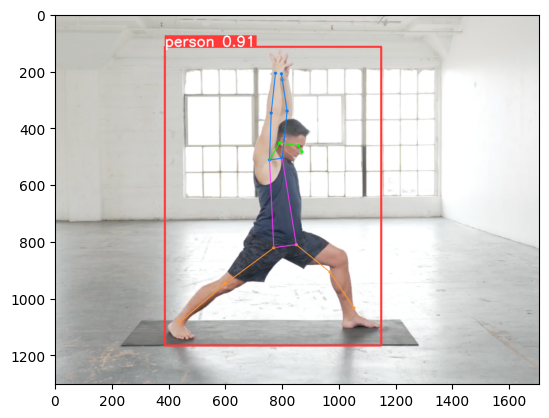

In [6]:
result = results[0]
result_image_arr = result.plot()
result_image_arr = cv2.cvtColor(result_image_arr, cv2.COLOR_BGR2RGB)

plt.imshow(result_image_arr)
plt.show()